In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from motor.motor_asyncio import AsyncIOMotorClient, AsyncIOMotorDatabase, AsyncIOMotorCursor
import os


load_dotenv()

True

In [52]:
client: AsyncIOMotorClient = AsyncIOMotorClient(os.getenv('DATABASE_URL'))
db: AsyncIOMotorDatabase = client["rijexamen-meldingen"]
cursor:AsyncIOMotorCursor = db["server_response_times"].find({})
data:list = await cursor.to_list(length=None)
df = pd.DataFrame(data)
df['response_time'] = (df['end'] - df['start']).dt.total_seconds()
df['exam_center_id'] = df['request_body'].apply(lambda x: x['examCenterId'])
df.head()

,_id,start,end,request_body,response_size,response_time,exam_center_id
0,66cd83a1fd20930c4d09594b,2024-08-27 07:43:28.972,2024-08-27 07:43:29.608,"{'examCenterId': 1, 'licenseType': 'B', 'examT...",2,0.636,1
1,66cd841afd20930c4d09594c,2024-08-27 07:45:29.840,2024-08-27 07:45:30.531,"{'examCenterId': 7, 'licenseType': 'B', 'examT...",2,0.691,7
2,66cd8493fd20930c4d09594d,2024-08-27 07:47:30.745,2024-08-27 07:47:31.300,"{'examCenterId': 8, 'licenseType': 'B', 'examT...",2,0.555,8
3,66cd850cfd20930c4d09594e,2024-08-27 07:49:31.516,2024-08-27 07:49:32.118,"{'examCenterId': 9, 'licenseType': 'B', 'examT...",2,0.602,9
4,66cd8584fd20930c4d09594f,2024-08-27 07:51:32.334,2024-08-27 07:51:32.908,"{'examCenterId': 10, 'licenseType': 'B', 'exam...",2,0.574,10


## Response Time and Size Over Time

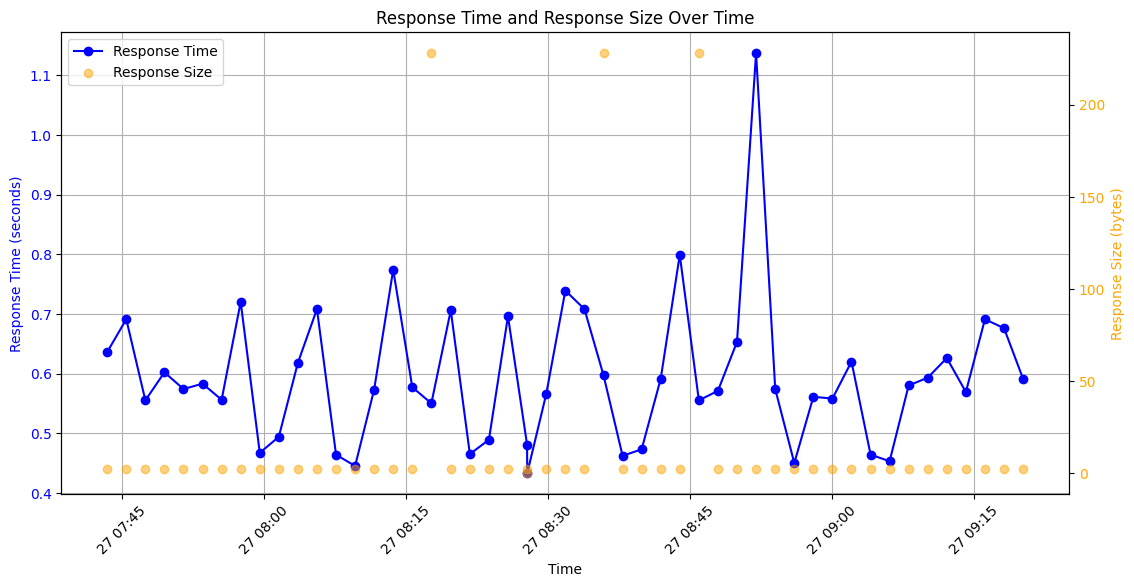

In [53]:
fig, ax1 = plt.subplots(figsize=(13, 6))

ax1.plot(df['start'], df['response_time'], color='blue', marker='o', label='Response Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Response Time (seconds)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Response Time and Response Size Over Time')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

ax2 = ax1.twinx()
ax2.scatter(df['start'], df['response_size'], color='orange', alpha=0.5, label='Response Size')
ax2.set_ylabel('Response Size (bytes)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()


## Correlation Between Response Time and Response Size

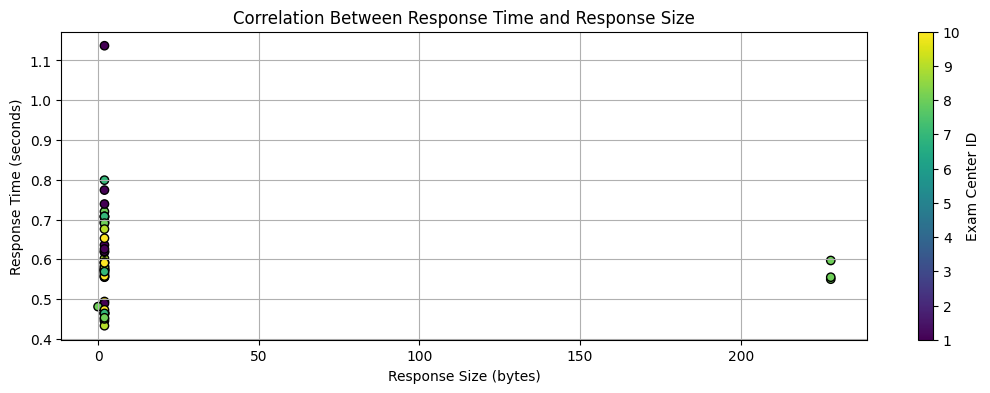

In [54]:
plt.figure(figsize=(13, 4))
plt.scatter(df['response_size'], df['response_time'], c=df['exam_center_id'], cmap='viridis', edgecolor='k')
plt.colorbar(label='Exam Center ID')
plt.title('Correlation Between Response Time and Response Size')
plt.xlabel('Response Size (bytes)')
plt.ylabel('Response Time (seconds)')
plt.grid(True)
plt.show()

## Average Response Time by Exam Center

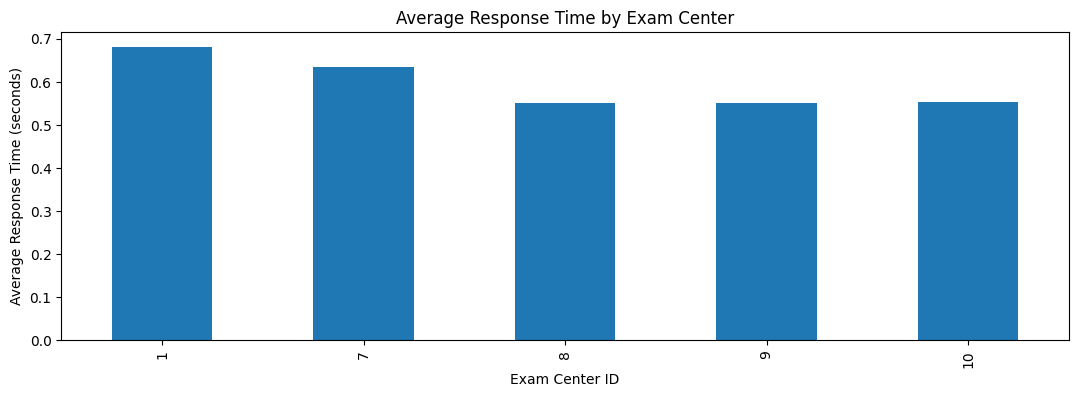

In [55]:
plt.figure(figsize=(13, 4))
df.groupby('exam_center_id')['response_time'].mean().plot(kind='bar')
plt.title('Average Response Time by Exam Center')
plt.xlabel('Exam Center ID')
plt.ylabel('Average Response Time (seconds)')
plt.show()
